<a href="https://colab.research.google.com/github/Przemo200/Analysis-of-apartment-prices-in-Wroclaw/blob/main/FlatsPricesWroclaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 **Apartments price analysis and prediction in Wroclaw**

### 🎯 **Project objectives**
---
**Goal:** Analyze data about apartments in Wroclaw and show crucial dependencies in visualisation and build a predictive model for apartment prices in Wroclaw to assist home buyers, sellers, investors, and real estate professionals in making data-driven decisions.  

**Why Wroclaw?** As a rapidly developing city with an increasing population and high student inflow, Wroclaw represents a dynamic real estate market. As a current student renting in Wroclaw, this project is also personally relevant for future purchasing decisions.  

**Business impact:** A reliable price prediction model helps reduce negotiation time, optimize property investment strategies, and assist in fair property evaluations. It also allows real estate agencies to set accurate prices based on empirical data.

---

### 📥 **Download dataset from Kaggle using `kagglehub`**
> Firstly, let's download the apartment prices dataset from Kaggle and display the path and files available in the directory.


In [111]:
import kagglehub
import os

path = kagglehub.dataset_download('krzysztofjamroz/apartment-prices-in-poland')

print('Path to dataset files:', path)
print('List of files in downloaded dataset: ', os.listdir(path))

Path to dataset files: /kaggle/input/apartment-prices-in-poland
List of files in downloaded dataset:  ['apartments_pl_2024_06.csv', 'apartments_rent_pl_2024_03.csv', 'apartments_rent_pl_2024_02.csv', 'apartments_pl_2024_02.csv', 'apartments_rent_pl_2023_12.csv', 'apartments_pl_2023_12.csv', 'apartments_rent_pl_2024_05.csv', 'apartments_rent_pl_2024_06.csv', 'apartments_rent_pl_2024_04.csv', 'apartments_pl_2024_04.csv', 'apartments_rent_pl_2024_01.csv', 'apartments_pl_2024_01.csv', 'apartments_pl_2024_05.csv', 'apartments_pl_2024_03.csv', 'apartments_pl_2023_08.csv', 'apartments_pl_2023_10.csv', 'apartments_pl_2023_11.csv', 'apartments_pl_2023_09.csv', 'apartments_rent_pl_2023_11.csv']



### 📄 **Load and inspect the dataset**
> Now it is time to load the CSV file into a DataFrame, inspect the data structure and preview the first rows.


In [112]:
import pandas as pd

df = pd.read_csv(os.path.join(path, 'apartments_pl_2024_06.csv'))

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21501 entries, 0 to 21500
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21501 non-null  object 
 1   city                  21501 non-null  object 
 2   type                  17104 non-null  object 
 3   squareMeters          21501 non-null  float64
 4   rooms                 21501 non-null  float64
 5   floor                 17928 non-null  float64
 6   floorCount            21292 non-null  float64
 7   buildYear             18121 non-null  float64
 8   latitude              21501 non-null  float64
 9   longitude             21501 non-null  float64
 10  centreDistance        21501 non-null  float64
 11  poiCount              21501 non-null  float64
 12  schoolDistance        21490 non-null  float64
 13  clinicDistance        21438 non-null  float64
 14  postOfficeDistance    21481 non-null  float64
 15  kindergartenDistanc

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,811891f98a870dfd6e414374a0a85560,szczecin,blockOfFlats,47.00,2.0,6.0,12.0,1981.0,53.428544,14.552812,...,0.085,condominium,concreteSlab,NaN,no,yes,yes,no,yes,449000
1,adaf636d0c44d8d9325bce42403eefee,szczecin,apartmentBuilding,88.22,3.0,1.0,2.0,2000.0,53.449093,14.516844,...,0.668,condominium,brick,premium,yes,yes,no,no,no,950000
2,9b957bd60885a469c96f17b58a914f4b,szczecin,apartmentBuilding,117.00,5.0,4.0,4.0,NaN,53.443096,14.561348,...,0.229,udział,brick,premium,yes,yes,no,no,no,1099000
3,74fef2ff7135bc70797a3fbfd7d44ed6,szczecin,blockOfFlats,33.31,1.0,1.0,4.0,1963.0,53.436100,14.541200,...,0.388,cooperative,brick,NaN,yes,no,no,yes,yes,380000
4,77cc78c75b0d09bf84d6d3124a28803c,szczecin,blockOfFlats,56.00,3.0,7.0,7.0,2018.0,53.447465,14.557811,...,0.178,condominium,brick,premium,yes,yes,yes,yes,yes,799000


### 🏙️ **Show available cities in the dataset**

> Before filtering the dataset, it is helpful to check which cities are available in the raw data.  
> This code lists all unique city names (sorted alphabetically) to let the user select a city for further analysis. As the project suggests - I have chosen Wroclaw


In [113]:
available_cities = df['city'].dropna().unique()
available_cities.sort()

print('Available cities in the dataset:')
for city in available_cities:
    print(f'- {city.capitalize()}')

Available cities in the dataset:
- Bialystok
- Bydgoszcz
- Czestochowa
- Gdansk
- Gdynia
- Katowice
- Krakow
- Lodz
- Lublin
- Poznan
- Radom
- Rzeszow
- Szczecin
- Warszawa
- Wroclaw


### 🏙️ **Filter data for Wroclaw apartments**
> I would like to keep only listings located in Wroclaw and select relevant columns for the analysis. Also, it will be great to calculate the price per square meter, so let's add that


In [114]:
# Here you can choose your own city, however - I have chosen Wroclaw and the whole storytelling will be about that city
# Remember! No polish diacritical marks

city_name = 'Wroclaw'

# Only from Wroclaw
df = df[df['city'].str.contains(city_name, case=False, na=False)]

# Keep only relevant columns
columns_to_use = ['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount', 'centreDistance', 'buildYear', 'price']
df = df[columns_to_use]
df['price_per_m2'] = df['price'] / df['squareMeters']

# Drop rows with missing critical numeric data
df = df.dropna(subset=['squareMeters', 'price', 'floorCount', 'buildYear'])

# Filter unrealistic values - empirical rule
def filter_by_std(df, column):
    mean = df[column].mean()
    std = df[column].std()
    return df[(df[column] >= mean - 3 * std) & (df[column] <= mean + 3 * std)]

df = filter_by_std(df, 'squareMeters')
df = filter_by_std(df, 'price_per_m2')


df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1927 entries, 7731 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            1927 non-null   object 
 1   type            1705 non-null   object 
 2   squareMeters    1927 non-null   float64
 3   rooms           1927 non-null   float64
 4   floor           1634 non-null   float64
 5   floorCount      1927 non-null   float64
 6   centreDistance  1927 non-null   float64
 7   buildYear       1927 non-null   float64
 8   price           1927 non-null   int64  
 9   price_per_m2    1927 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 165.6+ KB


,city,type,squareMeters,rooms,floor,floorCount,centreDistance,buildYear,price,price_per_m2
7731,wroclaw,apartmentBuilding,56.56,3.0,2.0,3.0,6.64,2020.0,775000,13702.263083
7732,wroclaw,blockOfFlats,58.50,3.0,5.0,10.0,3.05,1980.0,639000,10923.076923
7733,wroclaw,apartmentBuilding,50.36,3.0,4.0,9.0,1.16,2023.0,875000,17374.900715
7734,wroclaw,tenement,65.36,3.0,NaN,1.0,5.03,1932.0,860000,13157.894737
7735,wroclaw,tenement,58.01,3.0,1.0,4.0,2.32,1910.0,849000,14635.407688


### 🔧 **Null values check**
> Now it will be good idea to check how many null values are in my filtered dataset

In [115]:
df.isnull().sum()

,0
city,0
type,222
squareMeters,0
rooms,0
floor,293
floorCount,0
centreDistance,0
buildYear,0
price,0
price_per_m2,0


### 🔧 **Missing values handling**
> Now let's fill missing categorical values and handle missing floor values

In [116]:
df['type'] = df['type'].fillna('no data')
df['floor'] = df['floor'].fillna(-1)

# If the floorCount is equal to 1 and there is no data about the floor
# I can assume that the apartment is located on the first floor
df.loc[(df['floor'] == -1) & (df['floorCount'] == 1), 'floor'] = 1

# In this place it is possible to check null values sum in each column once again
# The sum is 0 everywhere, which is great. Let's move for the next part
df.isnull().sum()


,0
city,0
type,0
squareMeters,0
rooms,0
floor,0
floorCount,0
centreDistance,0
buildYear,0
price,0
price_per_m2,0



### 📈 **Distribution of apartment prices and prices per m2**
> A histogram showing how apartment prices in Wroclaw are distributed


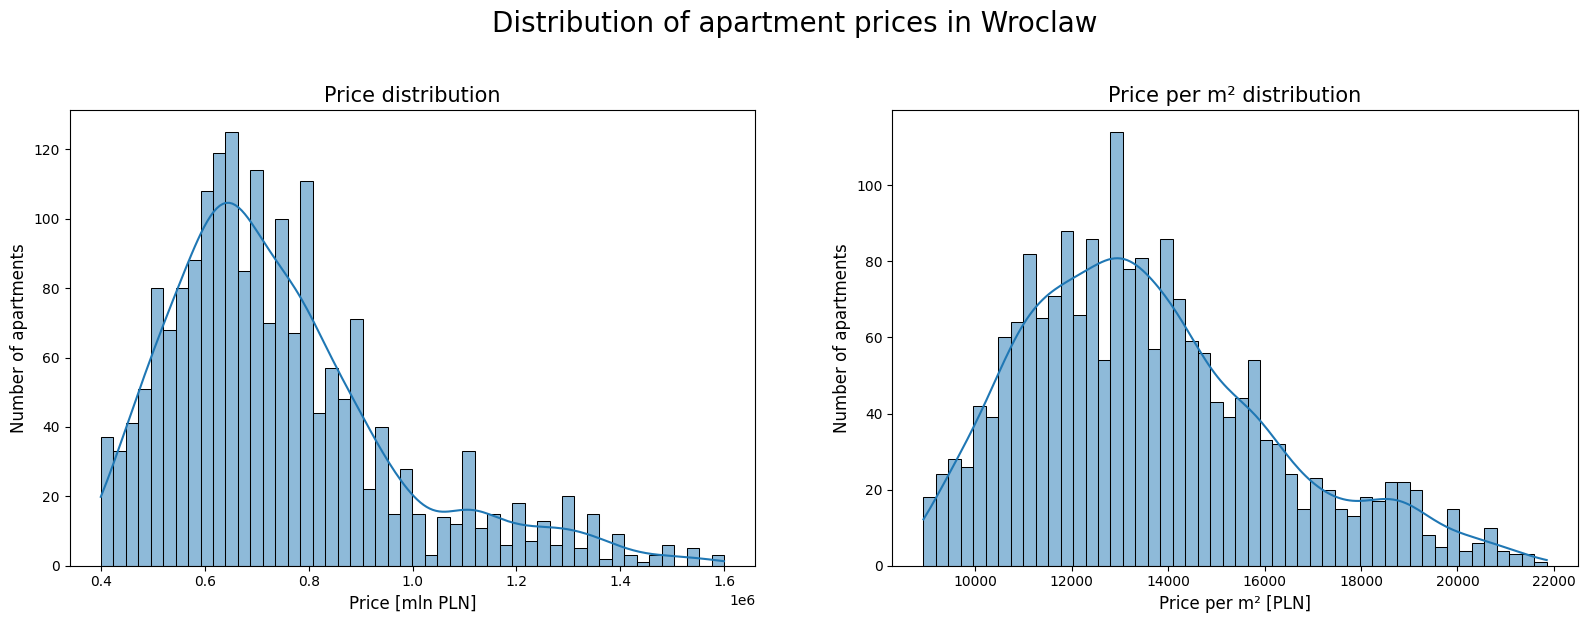

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.suptitle('Distribution of apartment prices in Wroclaw', fontsize=20, y=1.03)

# Subplot 1 — price
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price distribution', fontsize=15)
plt.xlabel('Price [mln PLN]', fontsize=12)
plt.ylabel('Number of apartments', fontsize=12)

# Subplot 2 — price per m²
plt.subplot(1, 2, 2)
sns.histplot(df['price_per_m2'], bins=50, kde=True)
plt.title('Price per m² distribution', fontsize=15)
plt.xlabel('Price per m² [PLN]', fontsize=12)
plt.ylabel('Number of apartments', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()



### 📦 **Boxplot: price per square meter vs number of rooms**
> We explore how the price per square meter varies by the number of rooms.



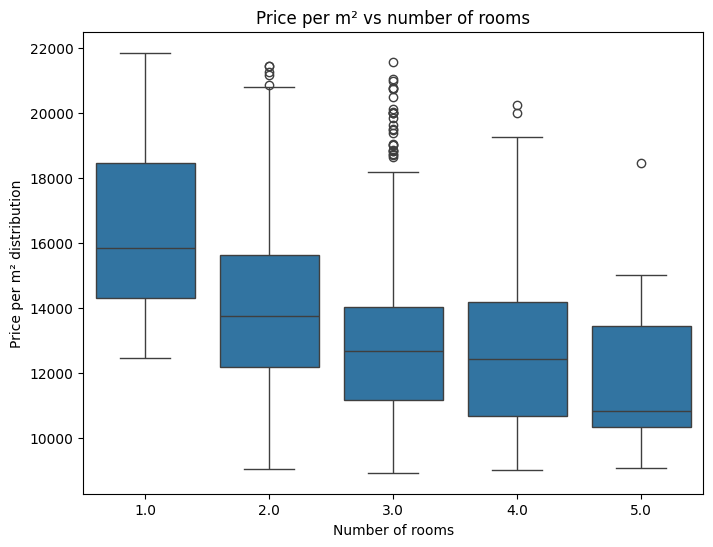

In [118]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='rooms', y='price_per_m2')
plt.title('Price per m² vs number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Price per m² distribution')
plt.show()


### 🏗️ **Line plots: price and price per m2 vs year built**
> This plots show how prices vary with the year the building was constructed


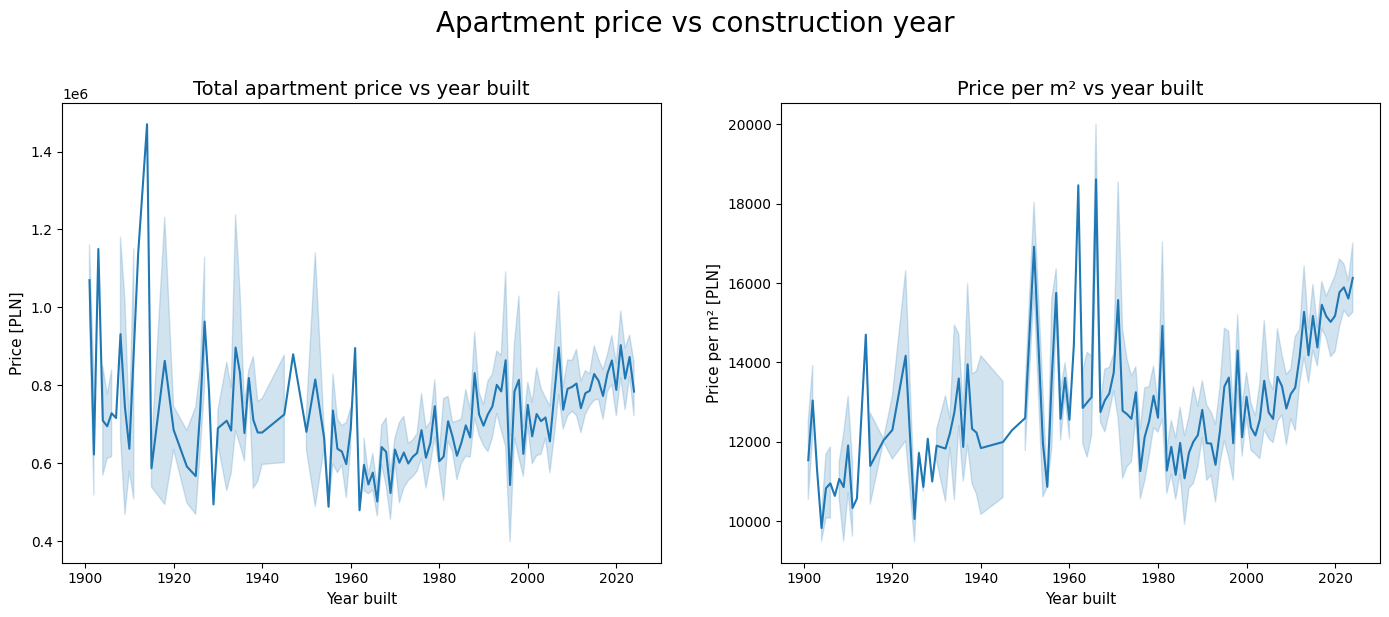

In [119]:
plt.figure(figsize=(14, 6))
plt.suptitle('Apartment price vs construction year', fontsize=20, y=1.02)

# Subplot 1 — total price vs year built
plt.subplot(1, 2, 1)
sns.lineplot(data=df[df['buildYear'] > 1900], x='buildYear', y='price')
plt.title('Total apartment price vs year built', fontsize=14)
plt.xlabel('Year built', fontsize=11)
plt.ylabel('Price [PLN]', fontsize=11)

# Subplot 1 — price per meter squared vs year built
plt.subplot(1, 2, 2)
sns.lineplot(data=df[df['buildYear'] > 1900], x='buildYear', y='price_per_m2')
plt.title('Price per m² vs year built', fontsize=14)
plt.xlabel('Year built', fontsize=11)
plt.ylabel('Price per m² [PLN]', fontsize=11)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()


### 🔥 **Correlation heatmap**
> A heatmap of numeric features to visualize how variables like area, price and floor are correlated


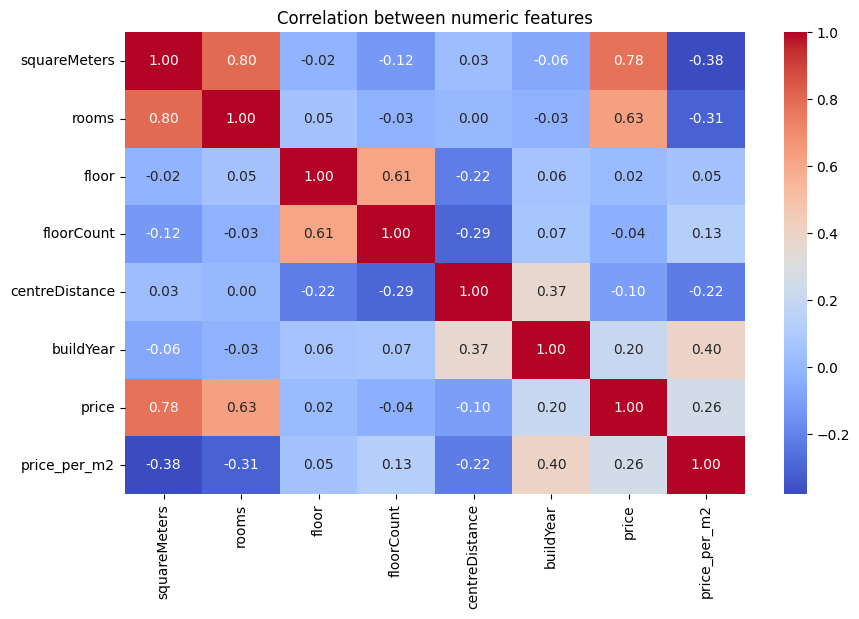

In [120]:
# Now I need to filter that, cause floor = -1 does not mean that the apartment is in basement
# I used '-1' to fill null values in floors data in missing data handling part
df_fil = df[df['floor'] != -1]

# Deleting floors equal to -1 will improve my numeric colums correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_fil.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between numeric features')
plt.show()



### 🧱 **Grouped bar charts by number of rooms**
> Average apartment price and price per square meter grouped by the number of rooms


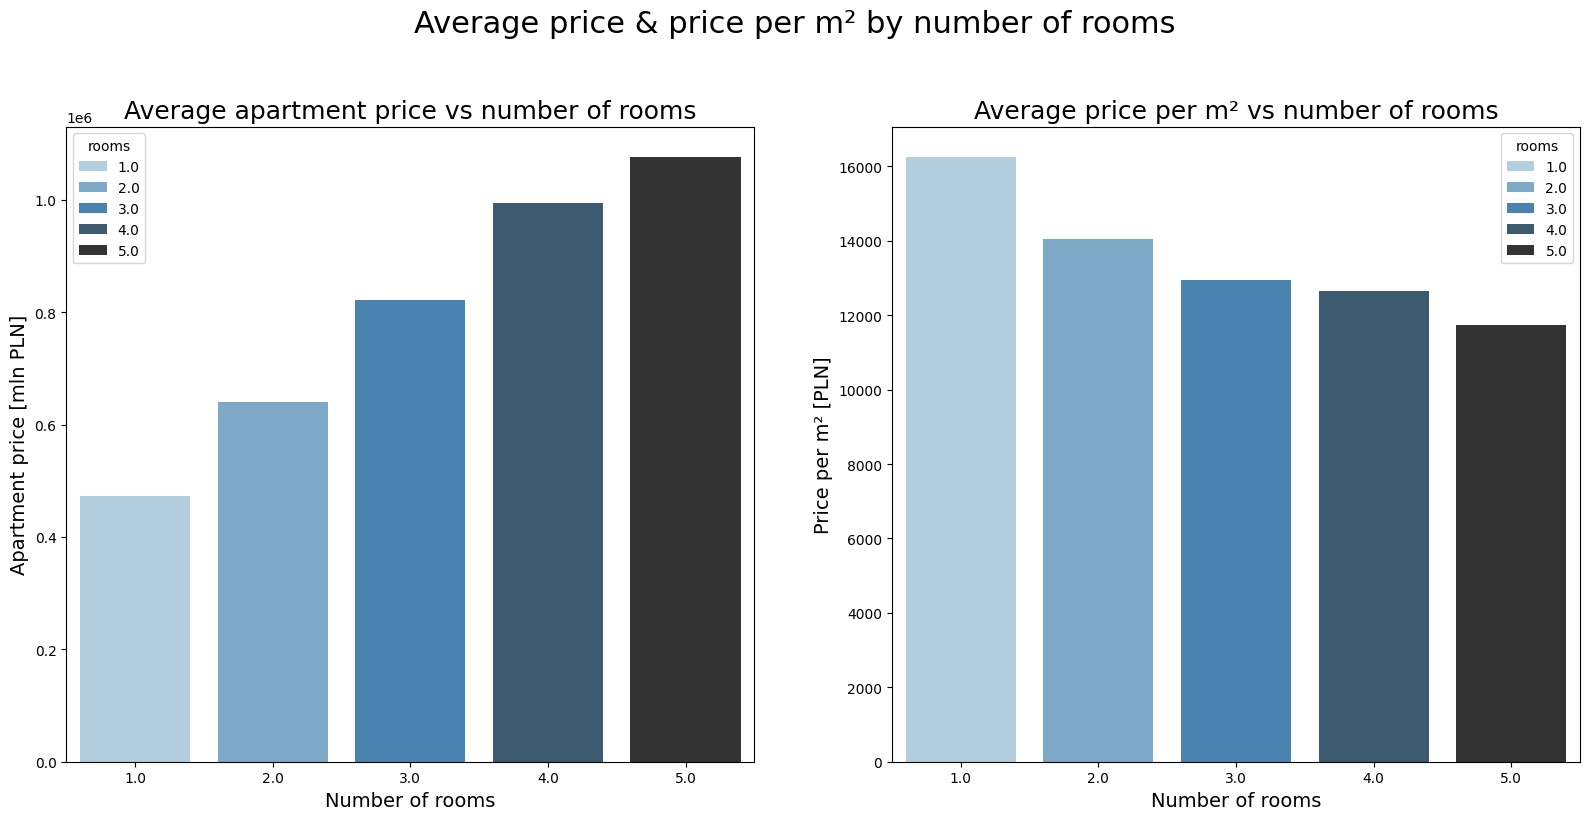

In [121]:
# Here is a section of plots showing dependencies between avg price and avg price per meter squared by number of rooms
grouped = df.groupby('rooms')[['price', 'squareMeters', 'price_per_m2']].mean().round(0).reset_index()

plt.figure(figsize=(16, 8))
plt.suptitle('Average price & price per m² by number of rooms', fontsize=22, y=1.02)

plt.subplot(1, 2, 1)
sns.barplot(data=grouped, x='rooms', y='price', palette='Blues_d', hue = 'rooms')
plt.title('Average apartment price vs number of rooms', fontsize=18)
plt.xlabel('Number of rooms', fontsize=14)
plt.ylabel('Apartment price [mln PLN]', fontsize=14)

plt.subplot(1, 2, 2)
sns.barplot(data=grouped, x='rooms', y='price_per_m2', palette='Blues_d', hue = 'rooms')
plt.title('Average price per m² vs number of rooms', fontsize=18)
plt.xlabel('Number of rooms', fontsize=14)
plt.ylabel('Price per m² [PLN]', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

### 🧭 **Scatter plot: price vs square meters**
> A scatter plot that shows how total price varies with apartment size, colored by number of rooms.


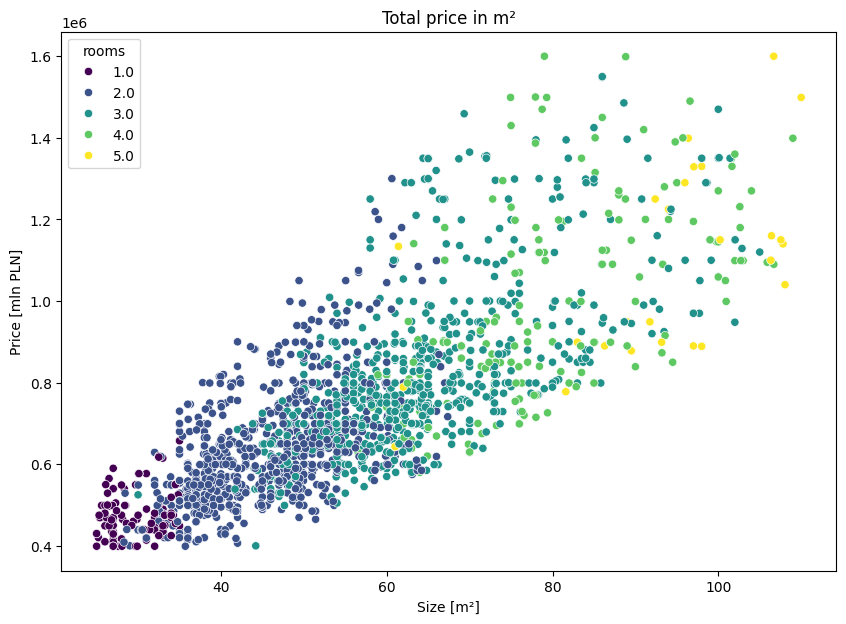

In [122]:
# Scatter plot showing dependencies between total price and size in meters squared
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='squareMeters', y='price', hue='rooms', palette='viridis')
plt.title('Total price in m²')
plt.xlabel('Size [m²]')
plt.ylabel('Price [mln PLN]')
plt.show()




### 🧱 **Heatmap: price per m² by floor and room count**
> A heatmap showing average price per square meter across different floors and number of rooms. To show the dependencies in a proper way I decided to use pivot table.


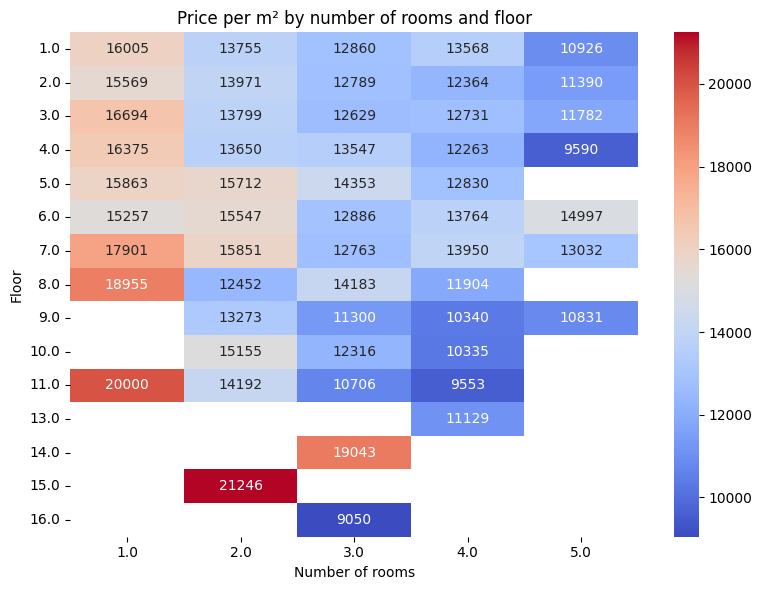

In [123]:
# Remember about df_fil? Cause now I am going to use it one more time
# Now it is time to prepare data for my heatmap as a pivot table

heatmap_data = df_fil.pivot_table(index='floor', columns='rooms', values='price_per_m2', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Price per m² by number of rooms and floor')
plt.xlabel('Number of rooms')
plt.ylabel('Floor')
plt.tight_layout()
plt.show()




### 🧠 **Linear regression model**
> In this part I am going to train a basic linear regression model to predict apartment prices using numerical features. However, the results are not the best, which is caused probably by the data distribution in my dataset. That is why I decided to add another model - XGBooster - which handles nonlinear data in a more suitable way than linear regression


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Select features
features = ['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'centreDistance']
df_model = df[features + ['price']].dropna()
df_model = df_model[df_model['floor'] != -1]

X = df_model[features]
y = df_model['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 📊 **Linear regression: training and evaluation metrics**
> Now let's evaluate the linear regression model using R², RMSE, and MAE to assess prediction accuracy. As we can see, the R^2 is around 0.730 which is not the best yet.

In [125]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f} zł")
print(f"MAE: {mae:,.0f} zł")

R²: 0.730
RMSE: 117,099 zł
MAE: 85,499 zł


### 📏 **Linear regression: coefficients and visualization**
> Let's visualize how much each feature contributes to the predicted price according to the linear regression model


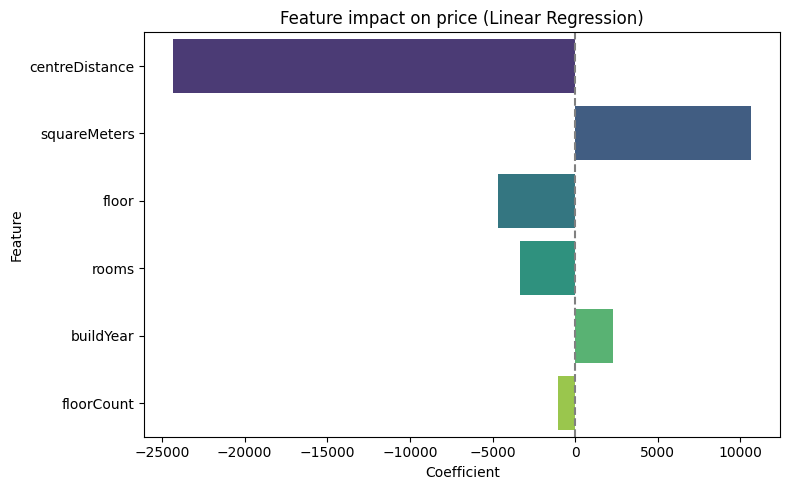

,Feature,Coefficient
5,centreDistance,-24311.923578
0,squareMeters,10643.254889
2,floor,-4686.627101
1,rooms,-3326.854774
4,buildYear,2275.334518
3,floorCount,-1035.958166


In [126]:
# Linear regression coefficients
coeffs = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=coeffs, x='Coefficient', y='Feature', palette='viridis', hue='Feature')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Feature impact on price (Linear Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

coeffs

### Feature importance (Linear Regression)

According to the linear regression model, the most influential feature on apartment price is the distance from the city center (`centreDistance`). It has a strong negative coefficient, meaning that as the distance increases, the price decreases significantly.

While this may make sense at first cause central locations are often more desirable. Such a strong impact could be due to multicollinearity – `centreDistance` might be correlated with other features like apartment size or build year. It is also possible that the dataset overrepresents city center properties with high prices.

Further analysis (e.g. correlation matrix or regularized models like Lasso) could help verify this result


### 🚀 **XGBoost regression model vs linear regression**
> Now let’s train an XGBoost model which typically performs better on structured/tabular data thanks to its ability to capture non-linear relationships


In [127]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
def print_metrics(y_true, y_pred, name):
    print(f'{name} Results:')
    print(f'R²: {r2_score(y_true, y_pred):.3f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):,.0f} zł')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):,.0f} zł\n')

print_metrics(y_test, y_pred, "Linear regression")
print_metrics(y_test, y_pred_xgb, "XGBoost")

Linear regression Results:
R²: 0.730
RMSE: 117,099 zł
MAE: 85,499 zł

XGBoost Results:
R²: 0.809
RMSE: 98,551 zł
MAE: 70,601 zł



### 🔢 **XGBoost: feature importance**
> Visualizing which features are most important in the XGBoost model

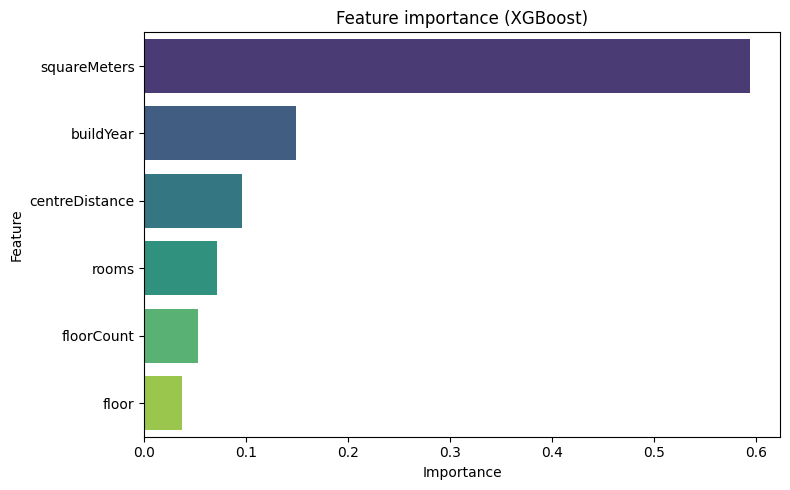

,Feature,Importance
0,squareMeters,0.594153
4,buildYear,0.148870
5,centreDistance,0.095962
1,rooms,0.071322
3,floorCount,0.052866
2,floor,0.036826


In [128]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis', hue='Feature')
plt.title('Feature importance (XGBoost)')
plt.tight_layout()
plt.show()

importance

### 📊 **Comparison of predicted prices**
> Comparing predictions from both models against actual prices


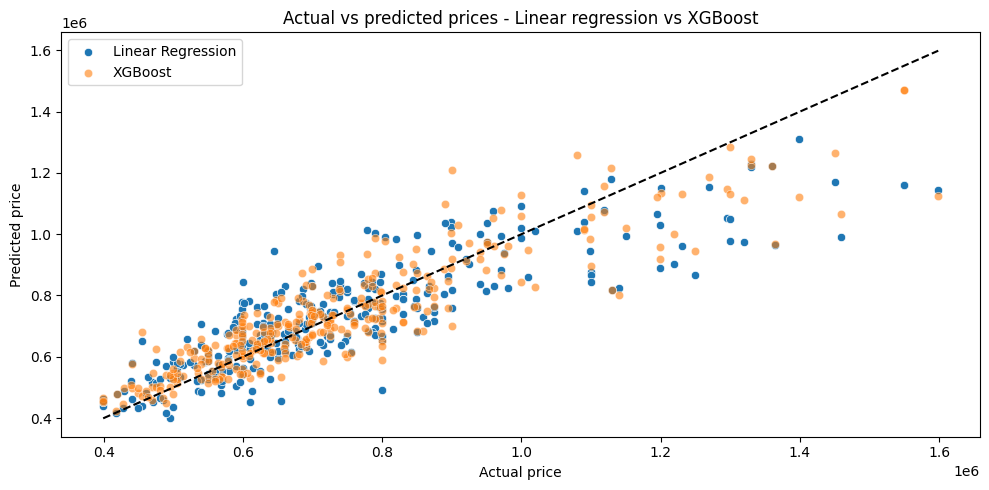

In [129]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, label='Linear Regression')
sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted prices - Linear regression vs XGBoost')
plt.legend()
plt.tight_layout()
plt.show()

### 🏠 **Price prediction for a sample apartment**
> Let's predict the price for a hypothetical apartment using my trained machine learning models


In [130]:
sample_apartment = {
    'squareMeters': 60,
    'rooms': 3,
    'floor': 5,
    'floorCount': 6,
    'buildYear': 2021,
    'centreDistance': 8
}

X_input = pd.DataFrame([sample_apartment])

# Predict using both models
pred_price_lin = model.predict(X_input)[0]
pred_price_xgb = xgb_model.predict(X_input)[0]

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Use MAE values
print("Predicted price for the sample apartment:")
print(f"Linear Regression: {pred_price_lin:,.0f} PLN ± {mae:,.0f} PLN")
print(f"XGBoost:           {pred_price_xgb:,.0f} PLN ± {mae_xgb:,.0f} PLN")

# Difference between predictions
diff = abs(pred_price_lin - pred_price_xgb)
print(f"\nDifference between models: {diff:,.0f} PLN")

Predicted price for the sample apartment:
Linear Regression: 747,754 PLN ± 85,499 PLN
XGBoost:           779,611 PLN ± 70,601 PLN

Difference between models: 31,857 PLN


### 💡 **Key business insights**

1. **Apartment pricing in Wroclaw is driven primarily by physical characteristics**  
   The most important factor influencing price is **apartment size**. Larger units command significantly higher prices regardless of location or floor level.

2. **Modern properties hold greater market value**  
   **Newer buildings** are priced higher, reflecting buyer preference for modern construction, energy efficiency and newer infrastructure.

3. **Proximity to the city center has limited but noticeable impact**  
   While central location increases value, its influence is secondary to size and year built. This suggests location matters, but not as much as often assumed.

4. **Non-linear models improve pricing accuracy**  
   Advanced machine learning models like **XGBoost** outperformed linear models in predicting apartment prices.  
   They capture complex patterns in the data, making them more suitable for real-world real estate valuation.

5. **Data-driven valuation supports better decisions**  
   Visual analytics and model-based pricing insights can support buyers, sellers, and agents in making **faster and fairer decisions**, minimizing uncertainty and improving market efficiency.
